In [38]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.6.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11974916383150093306
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10062135296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14750988645419978672
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [111]:
import pandas as pd
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 한글폰트 사용 시 그래프에서 마이너스 부호가 깨지지 않도록 해줌
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [127]:
os.chdir("C:\\Users\\yamingu\\Desktop")
prescription = pd.read_csv('real_prescription.csv')
prescription.head()

prescription.patientID = prescription.patientID.astype('str')
prescription.hosID = prescription.hosID.astype('str')
prescription.drugID = prescription.drugID.astype('str')
prescription.doctorID = prescription.doctorID.astype('str')
prescription.head()

,patientID,hosID,drugID,doctorID,prescription_amount,day,state
0,1,9,10,19,4,1,1
1,2,3,10,11,4,1,1
2,3,5,10,22,7,1,1
3,4,4,10,10,1,1,1
4,5,4,10,14,6,1,1


In [128]:
pat = prescription.loc[prescription['patientID'] == '4']
pat

,patientID,hosID,drugID,doctorID,prescription_amount,day,state
3,4,4,10,10,1,1,1
103,4,1,10,16,8,1,1
203,4,5,10,22,9,1,1
303,4,1,10,16,3,1,1
403,4,5,10,22,1,1,1
503,4,4,10,4,9,1,1
603,4,9,10,19,2,1,1
703,4,1,10,24,6,1,1
803,4,9,10,20,5,1,1
903,4,9,10,20,6,1,1


In [129]:
pat

,patientID,hosID,drugID,doctorID,prescription_amount,day,state
3,4,4,10,10,1,1,1
103,4,1,10,16,8,1,1
203,4,5,10,22,9,1,1
303,4,1,10,16,3,1,1
403,4,5,10,22,1,1,1
503,4,4,10,4,9,1,1
603,4,9,10,19,2,1,1
703,4,1,10,24,6,1,1
803,4,9,10,20,5,1,1
903,4,9,10,20,6,1,1


환자 ID를 입력하세요 : 7
----------------------------------------------------------------

환자의 평균 복용량은 5.509 (mg) 입니다.
귀하의 평균 복용량은 4.9 (mg) 입니다.
귀하는 평균 복용량보다 11.05 (%) 적게 복용하고 있습니다.

-------------------------------------------------------------------



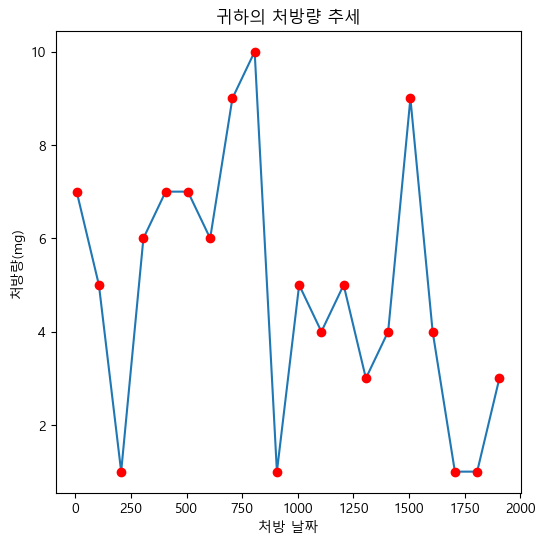

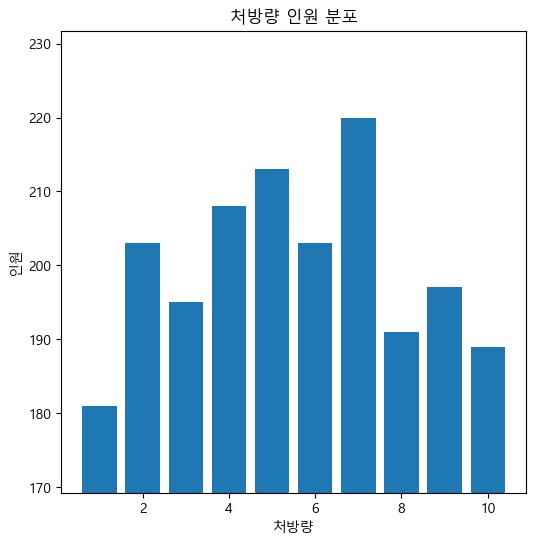

In [137]:
num = str(input('환자 ID를 입력하세요 : '))

pat = prescription.loc[prescription['patientID'] == num]

all_mean = np.mean(prescription.prescription_amount)
your_mean = np.mean(pat.prescription_amount)

print("----------------------------------------------------------------")
print()

print("환자의 평균 복용량은", all_mean, "(mg) 입니다.")
print("귀하의 평균 복용량은", your_mean, "(mg) 입니다.")

if your_mean > all_mean:
    print("귀하는 평균 복용량보다", round(your_mean / all_mean * 100 - 100, 2), "(%) 많이 복용하고 있습니다.")
elif your_mean < all_mean:
    print("귀하는 평균 복용량보다", round(-(your_mean / all_mean * 100 - 100), 2), "(%) 적게 복용하고 있습니다.")
else:
    print("귀하는 적정 수준 복용하고 있습니다.")
    
    
print()    
print('-------------------------------------------------------------------')
print()


# 라인차트
## prescription record 업데이트 후
## 인덱스 date로 바꿔서 plot할 것
# plt.subplot(1,1,2)

fig = plt.figure(figsize = (6, 6))
#fig.add_subplot(1,2,1)
plt.title('귀하의 처방량 추세')
plt.ylabel('처방량(mg)')
plt.xlabel('처방 날짜')
plt.plot(pat.prescription_amount, marker = 'o', mec = 'r', mfc = 'r')
plt.show()


# 히스토그램
#fig.add_subplot(1,2,2)
fig = plt.figure(figsize = (6, 6))
a = prescription.copy()
a.prescription_amount = a.prescription_amount.astype('str')

res = a.groupby('prescription_amount').agg({'patientID' : 'count'})
res = res.reset_index()
res.prescription_amount = res.prescription_amount.astype('int64')
res = res.sort_values('prescription_amount')

## 해당 환자의 가장 마지막 처방량
last = pat.iloc[-1]['prescription_amount']

plt.title('처방량 인원 분포')
plt.xlabel('처방량')
plt.ylabel('인원')

plt.bar(res.prescription_amount, res.patientID)
#plt.bar(last, res['prescription_amount'] == last, color = 'r')
plt.ylim([res.patientID.min()-res.patientID.std(), res.patientID.max()+res.patientID.std()])
plt.show()